# Cellular Automata Testing

The purpose of this code is to test the tasks in assignment 3 related to cellular automata.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import animation, rc
from IPython.display import HTML
import copy
%matplotlib inline
#%matplotlib notebook

# import seaborn as sns
# sns.set(palette="bright")
# plt.style.use('seaborn-pastel')

In [4]:
def cellular_step(states, rule_number):
    """Applies the specified rule number to the list of states by converting it into binary,
    and using the the 3 bit integer associated with every neighborhood of cells in the 
    list, indexes the appropriate state change from the binary rule number. Classically
    the leading digits in the binary representation of the rule number correspond to state
    changes in the largest integers associated with the state neighborhoods (for instance 
    the left most digit would be the state change for the neighborhood 111, associated with 
    the integer 7), so as larger indexes relate to items further right in an array we invert
    the binary representation of the rule_number.
    
    Arguments:
    states -- a row of states associated for a cellular automaton
    rule_number -- an 8 bit integer associated with a way of obtaining the next
                    state for each cell in states using the values of its neighbors
                    
    Returns:
    states -- the new generation of the states after applying the transition rule
    """
    
    # Turns the integer rule number into an 8 bit binary number, and reverses its order
    transition_rule = np.unpackbits( np.uint8(rule_number) )[::-1]
    
    # Initializes an array for storing the index associated to the transition of each cell
    indices = np.zeros(len(states), dtype = np.uint8)
    
    # Determines the index in the transition rule for each cell in the list of states
    for i in range(len(states)):
        # Converts the triple of ones and zeros associated to any state neighborhood into 
        # a base ten integer. Uses mod len(states) so that the cells on the edges loop around
        # when looking at their neighbors
        indices[i] = states[(i-1) % len(states)]*4+states[i % len(states)]*2 + states[(i+1)%len(states)]
        
        

    # Applies the transition rule to each state using its calculated index
    states = transition_rule[ indices ]

    return states

In [1035]:
def run_automaton(ncells, ngens, rule_number):
    """Runs the given rule number on a collection of cells
    of length ncells a specified number of times, and returns
    a grid containing each generation.
    """
    
    # Initializes row of states with a one in the center
    states = np.zeros(ncells, dtype = np.uint8)
    states[len(states)//2] = 1
    
    # Creates a grid for storing the various generations of the cells
    grid = np.zeros((ngens, ncells), dtype = np.uint8)
    grid[1,:] = states
    
    # For each grid, updates the cell states with some cellular_step function and the given rule number
    for i in range(1,ngens):
        states = cellular_step(states, rule_number)
        grid[i,:] = states
    
    return grid

In [1011]:
def plot_automatonGrid(grid, rule_number):
    """Plots a grid containing the states of a cellular automaton 
    which evolved according to the given rule number.
    """
    
    # Plots and labels the grid of generations for the state transition associated with the rule number.
    plt.figure(figsize = (10,10)) 
    plt.imshow(grid.T)
    plt.grid(False)
    plt.xlabel("Cell number")
    plt.ylabel("Generation number")
    plt.title("CA Rule {}".format(rule_number))

In [734]:
def main_automaton(ncells, ngens, rule_number):
    """Obtains and plots the generations of a 1D-cellular automaton for a given rule number"""
    
    # Obtains the grid of state generations for the automaton
    grid = run_automaton(ncells, ngens, rule_number)
    
    # Plots the grid
    plot_automatonGrid(grid, rule_number)

In [735]:
# NOT NEEDED FOR ANYTHING
def gen_grid(ncells, ngens, rule_number):
    
    # Initializes row of states with a one in the center
    states = np.zeros(ncells, dtype = np.uint8)
    states[len(states)//2] = 1
    
    # Creates a grid for storing the various generations of the cells
    grid = np.zeros((ngens, ncells), dtype = np.uint8)
    grid[-1,:] = states
    
    yield grid
    
    # Yields a new random integer after each call of the function
    while True:
        # Obtains the next generation of the cellular automaton
        states = cellular_step(states, rule_number)
        
        grid[0:ngens-1,:] = grid[1:ngens,:]
        grid[-1,:] = states
        
        yield grid

In [736]:
def animate(i, rule_number, ngens, im):
    """Moves the current states in the grid last displayed to the screen
    up one row, and adds the new state row at the bottom of the grid
    before replacing the animation image by it."""
    
    # Obtains the current frame grid
    grid = im.get_array()
    
    # Obtains the most recent state at the bottom of the grid
    states = grid[-1,:]
    
    # Obtains the next generation of the cellular automaton
    states = cellular_step(states, rule_number)
    
    # Moves the states up one row, and adds the new row of states at the bottom
    grid[0:ngens-1,:] = grid[1:ngens,:]
    grid[-1,:] = states
    
    # Sets the array in im to the new grid, and returns the object
    im.set_array(grid)
    return [im]

In [737]:
def initialize(ncells, ngens):
    """Initializes a grid of generations, with the first state at
    the bottom for animation purposes."""
    
    # Initializes row of states with a one in the center
    states = np.zeros(ncells, dtype = np.uint8)
    states[len(states)//2] = 1
    
    # Creates a grid for storing the various generations of the cells
    grid = np.zeros((ngens, ncells), dtype = np.uint8)
    grid[-1,:] = states
    
    return grid

In [738]:
def animate_evolution(ncells, ngens, rule_number):
    """Animates the evolution of a 1D cellular automaton"""
    
    # Set up the figure 
    fig = plt.figure(figsize = (10,10))
    plt.grid(False)
    
    # Initializes the grid for the first frame of animation
    grid = initialize(ncells, ngens)
    
    # Turns the grid into an animatable object for plotting 
    im = plt.imshow(grid, animated = True)

    # Generates an animation using the animate function
    anim = animation.FuncAnimation(fig, animate, fargs = (rule_number, ngens, im), frames=200, interval=20, blit=True)
    plt.show()
    return anim

<IPython.core.display.Javascript object>


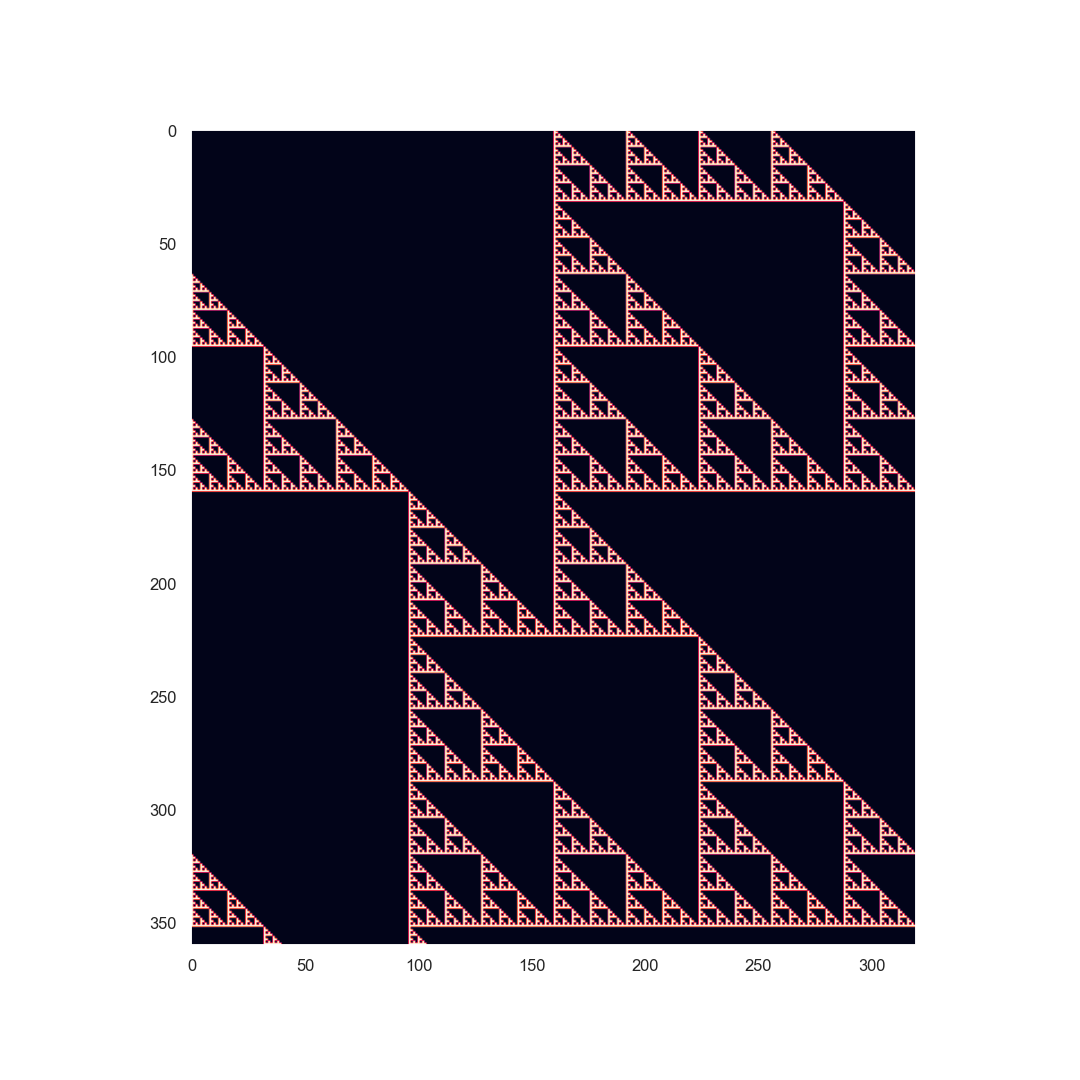

In [825]:
# Set up the figure 
ncells = 320
ngens = 360
rule_number = 60
animate_evolution(ncells, ngens, rule_number)

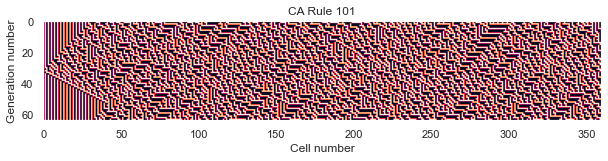

In [1017]:
main_automaton(64, 360, 101)

In [1019]:
# Taken from pseudo-random notes
def symbol_entropy(datalist):
    '''Estimate the Shannon entropy for a sequence of symbols.
    '''
    
    hist = {}
    for item in datalist:
        if item not in hist:
            hist[item] = 1
        else: 
            hist[item] += 1
            
    counts = np.array( [hist[item] for item in hist])
    prob = counts / np.sum(counts)
    prob = prob[ prob != 0 ] #; print(prob)
    entropy = -np.sum( prob * np.log2(prob) )

    return entropy

In [1051]:
def multi_step_rule_entropy(rule=86, steps=1, ncells=64, nevents=400):
    """This function takes in a given 1-D cellular automaton rule and calculates the total 
    entropy for a specific number of events where each event corresponds to a specific number 
    of successive steps in the state of the automaton.
    
    Arguments:
    rule -- an 8-bit unsigned integer that specified the automata rule in question
    steps -- the number of succesive steps in the automation being considered a single outcome
    ncells -- the number of cells of the automation
    nevents -- the number of outcomes which should be tested for the entropy calculation
    
    Returns:
    entropy/steps -- The function returns the sum of the total entropy of every cell over 
                    the course of the automation per step
    """
    
#     # Create the intial state
#     state = np.zeros(ncells, dtype=np.uint8)
#     state[ncells//2] = 1  # initialize one cell near the middle
    
#     nstates = nevents*steps
#     buffer = 50*steps
#     states = np.zeros([nstates, ncells], dtype=np.uint8)
#     for n in range(nstates + buffer):
#         state = cellular_step(state, rule)
#         if (n >= buffer):
#             states[n - buffer] = state
    
    # Get the states of the automaton
    buffer = 50 # Create a buffer so that the auomata reaches some form of steady state
    ngens = nevents*steps + buffer
    states = run_automaton(ncells, ngens, rule)
    states = states[buffer:,:] #Remove the buffer generations
    
    # Calculate the sum of the entropies of every cell
    entropy = 0
    for i in range(ncells):
        events = states[:,i].reshape(nevents, steps) # Reshape the grid into a single row of all values the cell had
        events_tuple = tuple(tuple(event) for event in events) # Cast to tuple for hashing purposes
        entropy += symbol_entropy(events_tuple) # Calculate the entropy for the cell
    
    return entropy/steps

In [1052]:
def multi_step_entropies(steps, ncells=64, nevents=400):
    """This function takes in a set of specified parameters for the single 
    cellular automaton and produces an array of values for the entropy of
    the automaton for every possible one dimensional rule as well as a sorted 
    list of the rules from the highest to the lowest entropy.
    
    Arguments:
    steps -- the number of succesive steps in the automation being considered a single outcome
    ncells -- the number of cells of the automation
    nevents -- the number of outcomes which should be tested for the entropy calculation
    
    Returns:
    sorted_rules -- an array of 256 8-bit unsigned integers corresponding to the single cell automata rules 
                    sorted from highest to lowest entropy
    entropies -- an array of 256 floating point numbers where every entry is the entropy corresponding to 
                the single cell automata rule specified by the index
    """
    
    entropies = np.zeros(256)

    # Calculate and store the entropies for every rule
    for rule in np.array(range(256), dtype=np.uint8):
        entropies[rule] = multi_step_rule_entropy(rule, steps, ncells, nevents)

    # Sort the rules by order of decreasing entropy
    sorted_rules = np.argsort(entropies)[::-1]
    
    return sorted_rules, entropies

In [1053]:
three_step_rules, three_step_entropies = multi_step_entropies(3)

## Traffic Simulations

In [519]:
from random import shuffle, uniform

In [801]:
def traffic_step(states, vmax, prob):
    """Performs a time step on the traffic, increasing and decreasing
    speeds as well as moving cars
    """
    L = len(states)
    new_states = [-1]*L
    
    
    for i in range(L):
        if states[i] > -1:
            vel_i = states[i]
            dist = 1
            while states[(i + dist) % L] < 0:
                dist += 1

            v_temp = min(vel_i+1, dist - 1, vmax) # increse speed up to max speed, but don't move further than next car
            if uniform(0,1) < prob:
                v_new = max(v_temp - 1, 0)
            else:
                v_new = v_temp  # with probability p hit the brakes, otherwise sustain velocity
            new_states[int((i + v_new) % L)] = v_new # perform the move
    
    return new_states

In [802]:
def run_traffic(ncells, ngens, vmax = 5, density = 0.48, prob = 0.5):
    
    grid = initialize_traffic(ncells, ngens, density)
    states = grid[-1,:]
    
    # For each grid, updates the cell states with some cellular_step function and the given rule number
    for i in range(1,ngens):
        states = traffic_step(states, vmax, prob)
        # Moves the states up one row, and adds the new row of states at the bottom
        grid[0:ngens-1,:] = grid[1:ngens,:]
        grid[-1,:] = states
    
    return grid

In [803]:
def plot_trafficGrid(grid, ngens, ncells):
    """Plots a grid containing the states of traffic
    which evolved according to certain rules.
    """
    
    
    plot_grid = grid + 1
    cmap1 = copy.copy(mpl.cm.get_cmap("OrRd"))
    cmap1.set_under("white")
    cmap1.set_over("black")
    # Plots and labels the grid of generations for the state transition associated with the rule number.
    plt.figure(figsize = (10,10)) 
    plt.imshow(plot_grid, cmap = cmap1, interpolation="nearest", vmin = 0.000000001, vmax = 0.99999)
    plt.grid(False)
    plt.xlabel("Cell number")
    plt.ylabel("Iteration number")
    plt.title("Traffic")

In [804]:
def main_traffic(ncells, ngens):
    """Obtains and plots the generations of a 1D-traffic line"""
    
    # Obtains the grid of state generations for the traffic
    grid = run_traffic(ncells, ngens)
    
    # Plots the grid
    plot_trafficGrid(grid, ngens, ncells)

In [814]:
def animate_traffic(i, ngens, im, vmax, prob):
    """Moves the current states in the grid last displayed to the screen
    up one row, and adds the new state row at the bottom of the grid
    before replacing the animation image by it."""
    
    # Obtains the current frame grid
    grid = im.get_array() - 1
    
    # Obtains the most recent state at the bottom of the grid
    states = grid[-1,:]
    
    # Obtains the next generation of the cellular automaton
    states = traffic_step(states, vmax, prob)
    
    # Moves the states up one row, and adds the new row of states at the bottom
    grid[0:ngens-1,:] = grid[1:ngens,:]
    grid[-1,:] = states
    
    # Sets the array in im to the new grid, and returns the object
    im.set_array(grid + 1)
    return [im]

In [815]:
def initialize_traffic(ncells, ngens, density):
    """Initializes a grid of generations, with the first state at
    the bottom for animation purposes."""
    
    # Initializes row of states with a one in the center
    ncars = int(ncells * density)
    states = [0] * ncars + [-1] * (ncells - ncars)
    shuffle(states)
    
    # Creates a grid for storing the various generations of the cells
    grid = np.zeros((ngens, ncells))
    grid[-1,:] = states
    
    return grid

In [823]:
def traffic_animation(ncells, ngens, density = 0.48, vmax = 5, prob = 0.2):
    """Animates the evolution of a 1D traffic simulation"""
    
    # Set up the figure 
    fig = plt.figure(figsize = (10,10))
    plt.grid(False)
    
    # Initializes the grid for the first frame of animation
    grid = initialize_traffic(ncells, ngens, density)
    cmap1 = copy.copy(mpl.cm.get_cmap("Greys"))
    cmap1.set_under("white")
    cmap1.set_over("black")
    plot_grid = grid + 1
    # Turns the grid into an animatable object for plotting 
    im = plt.imshow(plot_grid, animated = True, cmap = cmap1, interpolation="nearest", vmin = 0.000001, vmax = 0.999)

    # Generates an animation using the animate function
    anim = animation.FuncAnimation(fig, animate_traffic, fargs = (ngens, im, vmax, prob), frames=200, interval=20, blit=True)
    plt.show()
    return anim

<IPython.core.display.Javascript object>


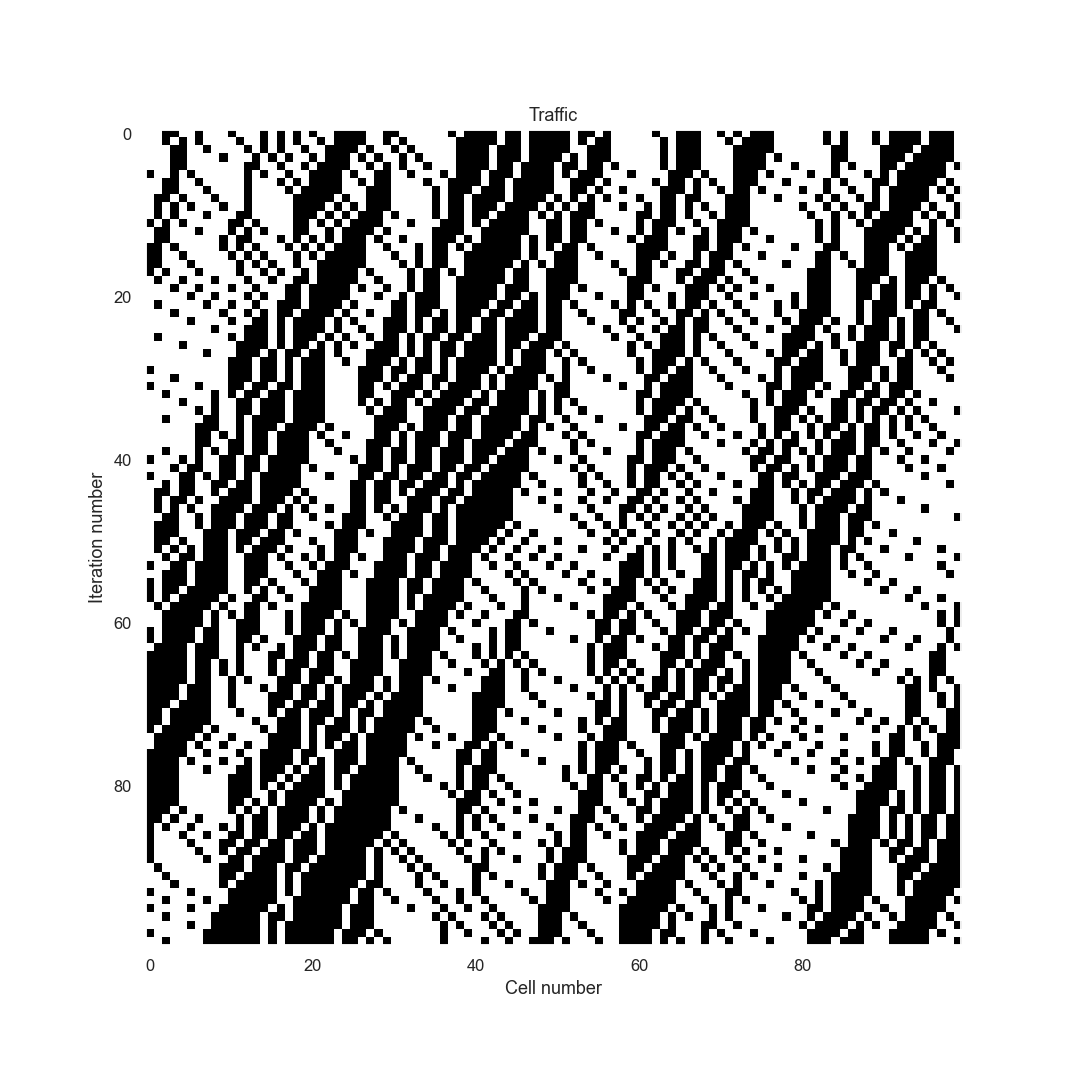

In [817]:
main_traffic(100, 100)

<IPython.core.display.Javascript object>


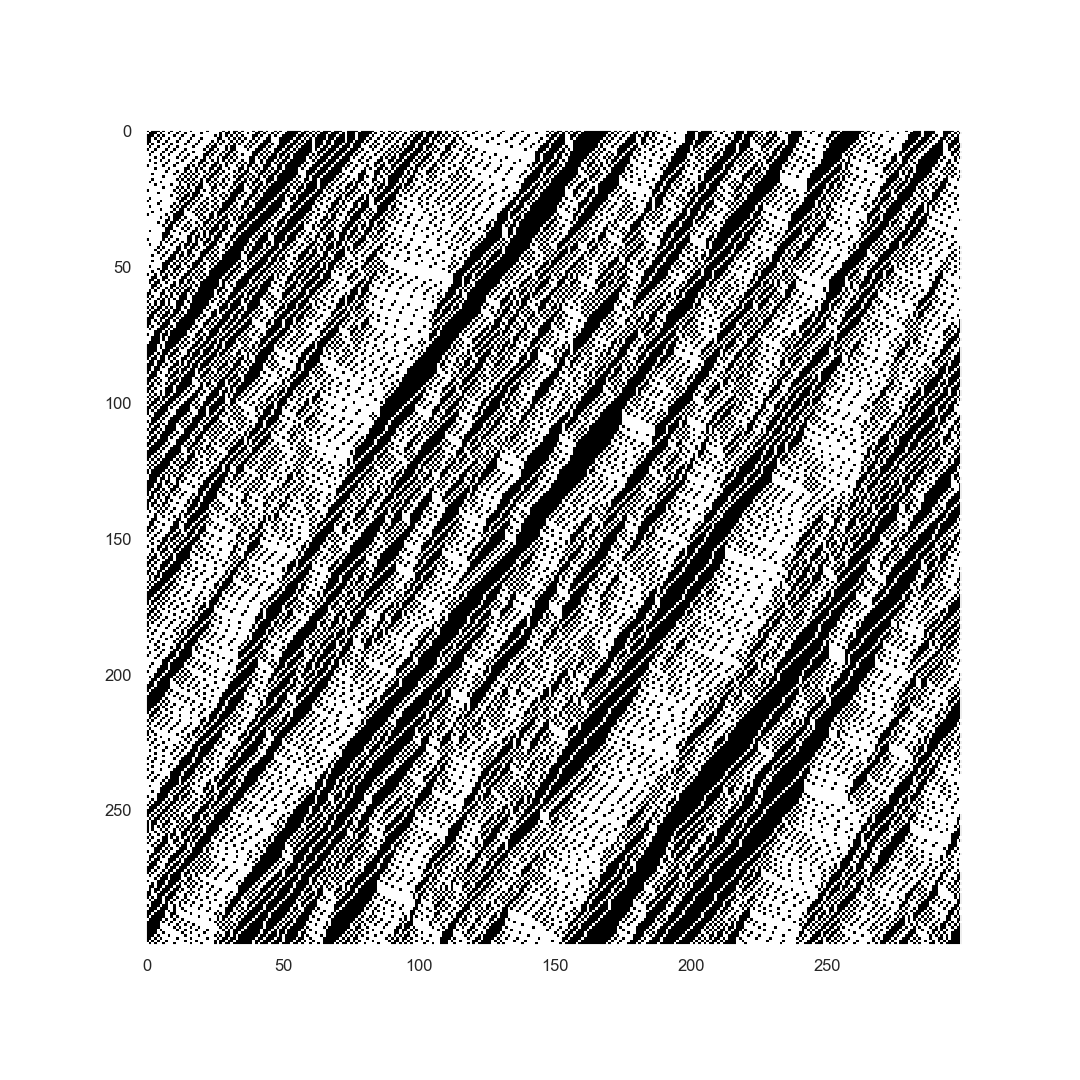

In [956]:
traffic_animation(300, 300)

## WireWorld

## Entropy and Psuedo-Randomness

In [958]:
def shannon_entropy(probs):
    """Returns the shannon entropy associated with a collection of probabilities"""
    
    # Calculates the shannon entropy
    entropy = -sum(np.log2(probs)*probs)
    
    return entropy

In [959]:
def warmupStates(ncells, warmup, rule_number):
    """Creates a row of cells, and iterates through
    a certain number of initial generations to 'warmup' the cell's states
    with respect to the given rule number"""
    
    # Initializes row of states with a one in the center
    states = np.zeros(ncells, dtype = np.uint8)
    states[len(states)//2] = 1
    
    # Applies the rule the number of times specified by warmup, without
    # adding the occurrence count
    for i in range(warmup):
        states = cellular_step(states, rule_number)
    
    return states

In [960]:
def entropyGrid(states, ngens, rule_number):
    
    grid = np.zeros((ngens, len(states)), dtype = np.uint8)
    
    for i in range(ngens):
        states = cellular_step(states, rule_number)
        
        grid[i] = states
        
    return grid

In [1004]:
def state_prob(ncells, rule_number, warmup = 80, testing = 200, test_gens = 2, test_cells = 1):
    """Determines a dictionary of probabilities for the probability of 
    each state occurring when the rule associated with the given number 
    is applied repeatedly"""
    
    # Returns the initialized states list after passing through the first few generations
    states = warmupStates(ncells, warmup, rule_number)
    
    grid = entropyGrid(states, testing, rule_number)
    
    # Initializes a dictionary to store states and their number of occurrences
    state_occurrences = {}
    
    center = len(states)//2
    
    # Applies the rule the number of times specified for testing
    for i in range(testing - test_gens):
        # Converts the states list into a string for use as a key
        state_tuple = tuple( [tuple(grid[j, center-test_cells-1:center+test_cells]) for j in range(i,i+test_gens)])
        print(state_tuple)
        # Either adds the state to the dictionary with value one,
        # or increments its count if it is already in the dictionary
        if state_tuple in list(state_occurrences.keys()):
            state_occurrences[state_tuple] += 1
        else:
            state_occurrences[state_tuple] = 1

    # Creates a dictionary of probabilities for each state
    probs = np.array( list(state_occurrences.values()) )
    
    # Total number of occurrences
    probs = probs/sum(probs)
    
    return probs

In [1005]:
def top5Rules(ncells = 64, num_cellstoTest = 2):
    """Creates and returns a dictionary of the rules with
    the top 5 highest entropies associated with their transitions."""
    
    # Initializes a dictionary for holding the rules and their entropies
    top5 = {}
    
    # Loops through every 8 bit rule
    for i in range(255):
        # Obtains a list of probabilities associated with the states of
        # the cells after applying the rule i numerous times
        probs = state_prob(ncells, i, test_cells = num_cellstoTest)
        
        # Obtains the entropy associated with the probability distribution for cell transitions
        entropy = shannon_entropy(probs)
        
        # If there are less than 5 rules in top5, add the current rule with its entropy
        if len(top5) < 5:
            top5[i] = entropy
        elif entropy > min(top5.values()): 
            # Otherwise, if the entropy is greater than the smallest entropy in the dictionary, 
            # remove the rule with the smallest entropy and add the current one.
            min_rule = min(top5, key = top5.get)
            top5.pop(min_rule)
            top5[i] = entropy
    
    return top5

In [1006]:
top5Rules()

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 1, 0, 0, 0), (0, 0, 1, 0, 0))
((0, 0, 1, 0, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 0, 1))
((0, 0, 0, 0, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1

((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0

((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0

((1, 1, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 1, 1, 0))
((0, 0, 1, 1, 0), (0, 1, 1, 0, 0))
((0, 1, 1, 0, 0), (0, 1, 0, 1, 1))
((0, 1, 0, 1, 1), (1, 1, 0, 1, 0))
((1, 1, 0, 1, 0), (0, 0, 0, 1, 1))
((0, 0, 0, 1, 1), (0, 0, 1, 1, 0))
((0, 0, 1, 1, 0), (1, 1, 1, 0, 1))
((1, 1, 1, 0, 1), (0, 0, 0, 0, 1))
((0, 0, 0, 0, 1), (1, 0, 0, 1, 1))
((1, 0, 0, 1, 1), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (1, 0, 0, 0, 1))
((1, 0, 0, 0, 1), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 0, 0, 1, 0))
((1, 0, 0, 1, 0), (0, 1, 1, 1, 1))
((0, 1, 1, 1, 1), (0, 1, 0, 0, 0))
((0, 1, 0, 0, 0), (1, 1, 1, 0, 0))
((1, 1, 1, 0, 0), (1, 0, 0, 1, 0))
((1, 0, 0, 1, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 0, 0, 0, 0))
((1, 0, 0, 0, 0), (0, 1, 0, 0, 0))
((0, 1, 0, 0, 0), (1, 1, 1, 0, 0))
((1, 1, 1, 0, 0), (1, 0, 0, 1, 1))
((1, 0, 0, 1, 1), (0, 1, 1, 1, 0))
((0, 1, 1, 1, 0), (0, 1, 0, 0, 1))
((0, 1, 0, 0, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 0, 0, 0, 0))
((1, 0, 0, 0, 0), (0, 1, 0, 0, 0))
((0, 1, 0, 0, 0), (0, 0, 1, 0, 0))
((0, 0, 1, 0, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 0, 1))
((0, 0, 0, 0, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 1, 0, 0, 0), (1, 1, 1, 0, 1))
((1, 1, 1, 0, 1), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (1, 0, 1, 1, 1))
((1, 0, 1, 1, 1), (0, 1, 0, 0, 0))
((0, 1, 0, 0, 0), (1, 1, 1, 0, 1))
((1, 1, 1, 0, 1), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (1, 0, 1, 1, 1))
((1, 0, 1, 1, 1), (0, 1, 0, 0, 0))
((0, 1, 0, 0, 0), (1, 1, 1, 0, 1))
((1, 1, 1, 0, 1), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (1, 0, 1, 1, 1))
((1, 0, 1, 1, 1), (0, 1, 0, 0, 0))
((0, 1, 0, 0, 0), (1, 1, 1, 0, 1))
((1, 1, 1, 0, 1), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (1, 0, 1, 1, 1))
((1, 0, 1, 1, 1), (0, 1, 0, 0, 0))
((0, 1, 0, 0, 0), (1, 1, 1, 0, 1))
((1, 1, 1, 0, 1), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (1, 0, 1, 1, 1))
((1, 0, 1, 1, 1), (0, 1, 0, 0, 0))
((0, 1, 0, 0, 0), (1, 1, 1, 0, 1))
((1, 1, 1, 0, 1), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (1, 0, 1, 1, 1))
((1, 0, 1, 1, 1), (0, 1, 0, 0, 0))
((0, 1, 0, 0, 0), (1, 1, 1, 0, 1))
((1, 1, 1, 0, 1), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (1, 0, 1, 1, 1))
((1, 0, 1, 1, 1), (0, 1, 0, 0, 0))
((0, 1, 0, 0, 0), (1

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 0, 0, 0, 0))
((1, 0, 0, 0, 0), (0, 1, 0, 0, 0))
((0, 1, 0, 0, 0), (0, 0, 1, 0, 0))
((0, 0, 1, 0, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 0, 1))
((0, 0, 0, 0, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1

((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0

((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 1))
((0, 0, 0, 0, 1), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 1, 0, 0))
((0, 0, 1, 0, 0), (0, 1, 0, 0, 0))
((0, 1, 0, 0, 0), (1, 0, 0, 0, 0))
((1, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0

((1, 1, 1, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (0

((0, 1, 0, 0, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (1, 1, 0, 0, 0))
((1, 1, 0, 0, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 1, 1, 1, 1))
((0, 1, 1, 1, 1), (0, 1, 0, 0, 0))
((0, 1, 0, 0, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 1, 0, 0, 0))
((0, 1, 0, 0, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 1, 0, 0, 0))
((0, 1, 0, 0, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 1, 0, 0, 0))
((0, 1, 0, 0, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (1, 1, 0, 0, 0))
((1, 1, 0, 0, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 1, 1, 1, 1))
((0, 1, 1, 1, 1), (0, 1, 0, 0, 0))
((0, 1, 0, 0, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (1, 1, 0, 0, 0))
((1, 1, 0, 0, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((1, 0, 1, 1, 1), (1, 0, 1, 0, 0))
((1, 0, 1, 0, 0), (0, 0, 0, 0, 1))
((0, 0, 0, 0, 1), (0, 1, 1, 1, 0))
((0, 1, 1, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 1, 1, 1, 1))
((0, 1, 1, 1, 1), (1, 1, 0, 0, 0))
((1, 1, 0, 0, 0), (0, 1, 0, 1, 1))
((0, 1, 0, 1, 1), (0, 0, 0, 1, 1))
((0, 0, 0, 1, 1), (0, 1, 1, 1, 1))
((0, 1, 1, 1, 1), (0, 1, 0, 0, 1))
((0, 1, 0, 0, 1), (1, 0, 0, 1, 0))
((1, 0, 0, 1, 0), (0, 0, 1, 0, 0))
((0, 0, 1, 0, 0), (0, 1, 0, 0, 1))
((0, 1, 0, 0, 1), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 1, 1, 0, 0))
((0, 1, 1, 0, 0), (1, 1, 1, 0, 1))
((1, 1, 1, 0, 1), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (1, 0, 0, 0, 1))
((1, 0, 0, 0, 1), (1, 0, 1, 1, 1))
((1, 0, 1, 1, 1), (0, 0, 1, 0, 0))
((0, 0, 1, 0, 0), (1, 1, 0, 0, 1))
((1, 1, 0, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0

((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0

((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0

((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0

((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0

((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0

((0, 1, 1, 1, 1), (0, 1, 0, 0, 1))
((0, 1, 0, 0, 1), (0, 0, 1, 0, 0))
((0, 0, 1, 0, 0), (1, 0, 0, 1, 1))
((1, 0, 0, 1, 1), (1, 1, 0, 1, 0))
((1, 1, 0, 1, 0), (1, 1, 0, 0, 0))
((1, 1, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 0, 0, 0, 0))
((1, 0, 0, 0, 0), (0, 1, 1, 1, 1))
((0, 1, 1, 1, 1), (0, 1, 0, 0, 0))
((0, 1, 0, 0, 0), (0, 0, 1, 1, 0))
((0, 0, 1, 1, 0), (1, 0, 1, 1, 0))
((1, 0, 1, 1, 0), (0, 0, 1, 1, 1))
((0, 0, 1, 1, 1), (1, 0, 1, 0, 0))
((1, 0, 1, 0, 0), (1, 0, 0, 1, 0))
((1, 0, 0, 1, 0), (0, 1, 0, 0, 1))
((0, 1, 0, 0, 1), (0, 0, 1, 0, 0))
((0, 0, 1, 0, 0), (1, 0, 0, 1, 0))
((1, 0, 0, 1, 0), (1, 1, 0, 0, 1))
((1, 1, 0, 0, 1), (0, 1, 1, 0, 1))
((0, 1, 1, 0, 1), (0, 1, 1, 0, 1))
((0, 1, 1, 0, 1), (0, 1, 1, 0, 0))
((0, 1, 1, 0, 0), (0, 1, 1, 1, 1))
((0, 1, 1, 1, 1), (0, 1, 0, 0, 1))
((0, 1, 0, 0, 1), (0, 0, 1, 0, 0))
((0, 0, 1, 0, 0), (1, 0, 0, 1, 0))
((1, 0, 0, 1, 0), (1, 1, 0, 0, 0))
((1, 1, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 0, 0, 0, 0))
((1, 0, 0, 0, 0), (0

((1, 1, 0, 0, 0), (0, 1, 1, 1, 1))
((0, 1, 1, 1, 1), (1, 1, 0, 0, 0))
((1, 1, 0, 0, 0), (0, 1, 1, 1, 1))
((0, 1, 1, 1, 1), (1, 1, 0, 0, 0))
((1, 1, 0, 0, 0), (0, 1, 1, 1, 1))
((0, 1, 1, 1, 1), (1, 1, 0, 0, 0))
((1, 1, 0, 0, 0), (0, 1, 1, 1, 1))
((0, 1, 1, 1, 1), (1, 1, 0, 0, 0))
((1, 1, 0, 0, 0), (0, 1, 1, 1, 1))
((0, 1, 1, 1, 1), (1, 1, 0, 0, 0))
((1, 1, 0, 0, 0), (0, 1, 1, 1, 1))
((0, 1, 1, 1, 1), (1, 1, 0, 0, 0))
((1, 1, 0, 0, 0), (0, 1, 1, 1, 1))
((0, 1, 1, 1, 1), (1, 1, 0, 0, 0))
((1, 1, 0, 0, 0), (0, 1, 1, 1, 1))
((0, 1, 1, 1, 1), (1, 1, 0, 0, 0))
((1, 1, 0, 0, 0), (0, 1, 1, 1, 1))
((0, 1, 1, 1, 1), (1, 1, 0, 0, 0))
((1, 1, 0, 0, 0), (0, 1, 1, 1, 1))
((0, 1, 1, 1, 1), (1, 1, 0, 0, 0))
((1, 1, 0, 0, 0), (0, 1, 1, 1, 1))
((0, 1, 1, 1, 1), (1, 1, 0, 0, 0))
((1, 1, 0, 0, 0), (0, 1, 1, 1, 1))
((0, 1, 1, 1, 1), (1, 1, 0, 0, 0))
((1, 1, 0, 0, 0), (0, 1, 1, 1, 1))
((0, 1, 1, 1, 1), (1, 1, 0, 0, 0))
((1, 1, 0, 0, 0), (0, 1, 1, 1, 1))
((0, 1, 1, 1, 1), (1, 1, 0, 0, 0))
((1, 1, 0, 0, 0), (0

((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0

((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0

((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (1, 1, 0, 0, 0))
((1, 1, 0, 0, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 0, 1, 0, 0))
((0, 0, 1, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 1, 1, 1, 1))
((0, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 1, 1, 1, 1))
((0, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0

((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 1))
((0, 0, 0, 0, 1), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 1, 0, 0))
((0, 0, 1, 0, 0), (0, 1, 0, 0, 0))
((0, 1, 0, 0, 0), (1, 0, 0, 0, 0))
((1, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0

((1, 1, 1, 1, 1), (0, 0, 0, 0, 1))
((0, 0, 0, 0, 1), (0, 0, 0, 1, 1))
((0, 0, 0, 1, 1), (0, 0, 1, 1, 1))
((0, 0, 1, 1, 1), (0, 1, 1, 0, 0))
((0, 1, 1, 0, 0), (1, 1, 1, 0, 0))
((1, 1, 1, 0, 0), (0, 0, 1, 0, 1))
((0, 0, 1, 0, 1), (0, 1, 1, 1, 1))
((0, 1, 1, 1, 1), (1, 1, 0, 0, 1))
((1, 1, 0, 0, 1), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (0, 1, 1, 1, 1))
((0, 1, 1, 1, 1), (1, 1, 0, 0, 0))
((1, 1, 0, 0, 0), (1, 1, 0, 0, 0))
((1, 1, 0, 0, 0), (0, 1, 0, 0, 1))
((0, 1, 0, 0, 1), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (0, 1, 1, 1, 1))
((0, 1, 1, 1, 1), (1, 1, 0, 0, 1))
((1, 1, 0, 0, 1), (0, 1, 0, 1, 1))
((0, 1, 0, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 0, 0, 0, 1))
((1, 0, 0, 0, 1), (1, 0, 0, 1, 1))
((1, 0, 0, 1, 1), (1, 0, 1, 1, 1))
((1, 0, 1, 1, 1), (1, 1, 1, 0, 0))
((1, 1, 1, 0, 0), (0, 0, 1, 0, 0))
((0, 0, 1, 0, 0), (0, 1, 1, 0, 1))
((0, 1, 1, 0, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 1))
((0, 0, 0, 0, 1), (0, 0, 0, 1, 1))
((0, 0, 0, 1, 1), (0, 0, 1, 1, 1))
((0, 0, 1, 1, 1), (0

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((1, 1, 1, 1, 0), (0, 0, 0, 1, 1))
((0, 0, 0, 1, 1), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (0, 0, 0, 1, 1))
((0, 0, 0, 1, 1), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (0, 0, 0, 1, 1))
((0, 0, 0, 1, 1), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (0, 0, 0, 1, 1))
((0, 0, 0, 1, 1), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (0, 0, 0, 1, 1))
((0, 0, 0, 1, 1), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (0, 0, 0, 1, 1))
((0, 0, 0, 1, 1), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (0, 0, 0, 1, 1))
((0, 0, 0, 1, 1), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (0, 0, 0, 1, 1))
((0, 0, 0, 1, 1), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (0, 0, 0, 1, 1))
((0, 0, 0, 1, 1), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (0, 0, 0, 1, 1))
((0, 0, 0, 1, 1), (1

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0

((1, 0, 1, 1, 1), (1, 1, 1, 0, 0))
((1, 1, 1, 0, 0), (1, 0, 1, 1, 0))
((1, 0, 1, 1, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 0, 0, 0, 1))
((1, 0, 0, 0, 1), (1, 1, 0, 0, 1))
((1, 1, 0, 0, 1), (1, 1, 1, 0, 1))
((1, 1, 1, 0, 1), (0, 0, 1, 1, 1))
((0, 0, 1, 1, 1), (0, 0, 1, 0, 0))
((0, 0, 1, 0, 0), (1, 0, 1, 1, 0))
((1, 0, 1, 1, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 0, 0, 0, 0))
((1, 0, 0, 0, 0), (1, 1, 0, 0, 0))
((1, 1, 0, 0, 0), (1, 1, 1, 0, 0))
((1, 1, 1, 0, 0), (0, 0, 1, 1, 0))
((0, 0, 1, 1, 0), (0, 0, 1, 1, 1))
((0, 0, 1, 1, 1), (0, 0, 1, 0, 0))
((0, 0, 1, 0, 0), (0, 0, 1, 1, 0))
((0, 0, 1, 1, 0), (1, 0, 1, 1, 1))
((1, 0, 1, 1, 1), (1, 1, 1, 0, 0))
((1, 1, 1, 0, 0), (1, 0, 1, 1, 0))
((1, 0, 1, 1, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 0, 0, 0, 1))
((1, 0, 0, 0, 1), (1, 1, 0, 0, 1))
((1, 1, 0, 0, 1), (1, 1, 1, 0, 1))
((1, 1, 1, 0, 1), (0, 0, 1, 1, 1))
((0, 0, 1, 1, 1), (0, 0, 1, 0, 0))
((0, 0, 1, 0, 0), (1, 0, 1, 1, 0))
((1, 0, 1, 1, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 0, 0, 0, 0))
((1, 0, 0, 0, 0), (1, 1, 0, 0, 0))
((1, 1, 0, 0, 0), (0, 1, 1, 0, 1))
((0, 1, 1, 0, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 1, 0, 0, 0), (0, 1, 1, 0, 0))
((0, 1, 1, 0, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 1))
((0, 0, 0, 1, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 0, 1, 1, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 1, 0, 1, 0))
((1, 1, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (1, 0, 1, 1, 1))
((1, 0, 1, 1, 1), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (1, 0, 1, 1, 1))
((1, 0, 1, 1, 1), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 1, 1, 1))
((0, 0, 1, 1, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 1, 0, 1, 0))
((1, 1, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (1, 0, 1, 1, 1))
((1, 0, 1, 1, 1), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (1, 0, 1, 1, 1))
((1, 0, 1, 1, 1), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 1, 1, 1))
((0, 0, 1, 1, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 1, 0, 1, 0))
((1, 1, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (1, 0, 1, 1, 1))
((1, 0, 1, 1, 1), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (1, 0, 1, 1, 1))
((1, 0, 1, 1, 1), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 1, 1, 1))
((0, 0, 1, 1, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 1, 0, 1, 0))
((1, 1, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 1, 1, 1))
((0, 0, 1, 1, 1), (0

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0

((0, 1, 1, 1, 0), (0, 1, 1, 0, 0))
((0, 1, 1, 0, 0), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 0, 0, 1, 1))
((1, 0, 0, 1, 1), (0, 1, 1, 1, 0))
((0, 1, 1, 1, 0), (0, 1, 1, 0, 0))
((0, 1, 1, 0, 0), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 0, 0, 1, 1))
((1, 0, 0, 1, 1), (0, 1, 1, 1, 0))
((0, 1, 1, 1, 0), (0, 1, 1, 0, 0))
((0, 1, 1, 0, 0), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 0, 0, 1, 1))
((1, 0, 0, 1, 1), (0, 1, 1, 1, 0))
((0, 1, 1, 1, 0), (0, 1, 1, 0, 0))
((0, 1, 1, 0, 0), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 0, 0, 1, 1))
((1, 0, 0, 1, 1), (0, 1, 1, 1, 0))
((0, 1, 1, 1, 0), (0, 1, 1, 0, 0))
((0, 1, 1, 0, 0), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 0, 0, 1, 1))
((1, 0, 0, 1, 1), (0, 1, 1, 1, 0))
((0, 1, 1, 1, 0), (0, 1, 1, 0, 0))
((0, 1, 1, 0, 0), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 0, 0, 1, 1))
((1, 0, 0, 1, 1), (0, 1, 1, 1, 0))
((0, 1, 1, 1, 0), (0, 1, 1, 0, 0))
((0, 1, 1, 0, 0), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 0, 0, 1, 1))
((1, 0, 0, 1, 1), (0, 1, 1, 1, 0))
((0, 1, 1, 1, 0), (0

((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 1, 1, 1, 1))
((0, 1, 1, 1, 1), (0, 0, 1, 1, 1))
((0, 0, 1, 1, 1), (1, 0, 0, 1, 0))
((1, 0, 0, 1, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1

((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1

((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1

((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1

((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1

((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1

((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1

((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1

((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1

((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (1, 0, 1, 0, 1))
((1, 0, 1, 0, 1), (0

((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1

((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1

((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1

((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1

((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1

((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0

((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0, 1, 0, 1, 0))
((0, 1, 0, 1, 0), (0

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0

((1, 1, 1, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (1

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 0, 1, 1, 0), (0, 0, 0, 1, 1))
((0, 0, 0, 1, 1), (0, 0, 0, 0, 1))
((0, 0, 0, 0, 1), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((1, 1, 0, 1, 1), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1

((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0, 0, 0, 0, 0))
((0, 0, 0, 0, 0), (0

((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0, 0, 0, 1, 0))
((0, 0, 0, 1, 0), (0

((1, 1, 0, 1, 1), (1, 1, 1, 0, 1))
((1, 1, 1, 0, 1), (0, 1, 1, 1, 0))
((0, 1, 1, 1, 0), (1, 0, 1, 1, 1))
((1, 0, 1, 1, 1), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 1, 1, 0, 1))
((1, 1, 1, 0, 1), (0, 1, 1, 1, 0))
((0, 1, 1, 1, 0), (1, 0, 1, 1, 1))
((1, 0, 1, 1, 1), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 1, 1, 0, 1))
((1, 1, 1, 0, 1), (0, 1, 1, 1, 0))
((0, 1, 1, 1, 0), (1, 0, 1, 1, 1))
((1, 0, 1, 1, 1), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 1, 1, 0, 1))
((1, 1, 1, 0, 1), (0, 1, 1, 1, 0))
((0, 1, 1, 1, 0), (1, 0, 1, 1, 1))
((1, 0, 1, 1, 1), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 1, 1, 0, 1))
((1, 1, 1, 0, 1), (1, 1, 1, 1, 0))
((1, 1, 1, 1, 0), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (0, 1, 1, 1, 1))
((0, 1, 1, 1, 1), (1, 0, 1, 1, 1))
((1, 0, 1, 1, 1), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1, 1, 1, 0, 1))
((1, 1, 1, 0, 1), (0, 1, 1, 1, 0))
((0, 1, 1, 1, 0), (1, 0, 1, 1, 1))
((1, 0, 1, 1, 1), (1, 1, 0, 1, 1))
((1, 1, 0, 1, 1), (1

((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1

((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1

((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1

((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1

((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1

((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1

((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1

((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1

((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1

((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1

((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1, 1, 1, 1, 1))
((1, 1, 1, 1, 1), (1

{45: 6.02915823194919,
 75: 6.06778823443275,
 86: 6.118941976764728,
 101: 6.115714655547304,
 149: 6.01998425937365}

In [88]:
top5

{30: 7.643856189774741,
 45: 7.643856189774741,
 73: 7.643856189774741,
 75: 7.643856189774741,
 86: 7.643856189774741}

In [118]:
def number_gen(rule_number, bits, warmup = 80):
    """Generates an integer of bits length using the binary
    string associated with the state of the cellular automata."""
    
    # Returns the initialized states list after passing through the first few generations
    states = warmupStates(bits, warmup, rule_number)
    powers = [2**i for i in range(bits)]
    
    # Yields a new random integer after each call of the function
    while True:
        # Obtains the next generation of the cellular automaton
        states = cellular_step(states, rule_number)
        
        # Converts the ones and zeros in the cells into an integer, reading the binary string left to right
        rand_int = sum(states*powers)
        
        # Yields the integer associated with the current state
        yield rand_int

In [119]:
def nrandNums(rule_number, nNums, bits = 64):
    """Returns a list of 10 numbers obtained from the evolution
    of a cellular automaton transitioning according to the rule number"""
    
    # Obtains the generator associated with the rule number
    gen = number_gen(rule_number, bits)
    
    # Initializes a list for the generated numbers
    rand_nums = []
    
    # Stores nNums random numbers in the list
    for i in range(nNums):
        rand_nums.append(next(gen))
    
    return rand_nums

In [930]:
def randdecis(rule_number, nNums, bits = 64):
    
    rand_nums = nrandNums(rule_number, nNums, bits = bits)
    
    rand_decis = np.array(rand_num) / 2**bits
    
    return rand_decis

<IPython.core.display.Javascript object>


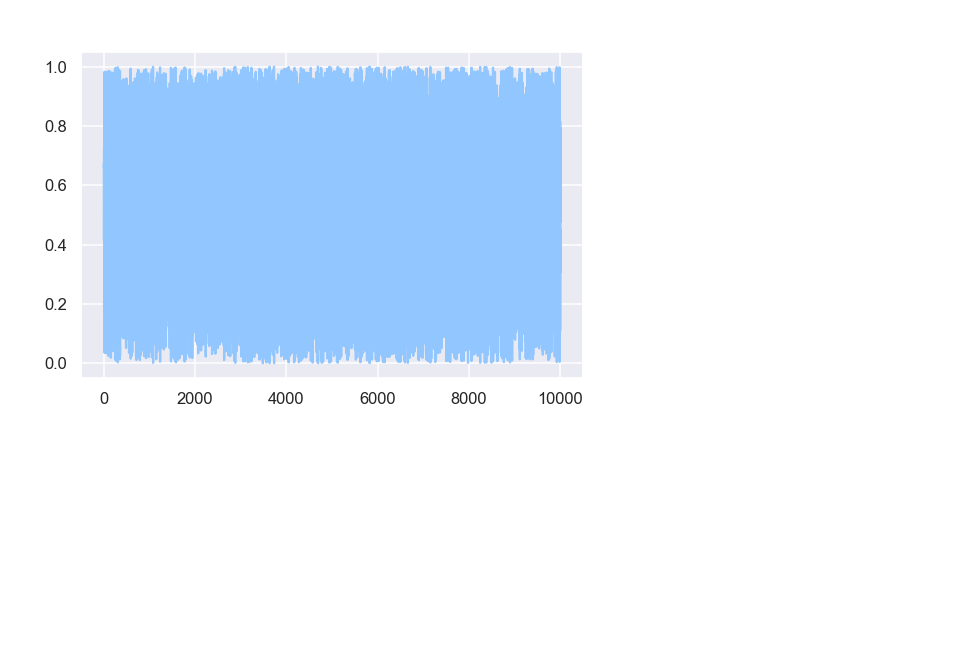

In [936]:
plt.plot(randdecis(30, 1000))

In [1048]:
?np.empty

# Game of Life

The code to follow is defined for running a simple version of the game of life.

In [5]:
# Jackel game of life code
def life_generation_stepper(grid, nsteps=1, plot=None):
    """ docstring
    """
    
    # get most recently used plotting window
    fig = list(map(plt.figure, plt.get_fignums()))[-1]

    nx, ny = grid.shape
    x, y = np.meshgrid( np.arange(nx), np.arange(ny), indexing='ij' )
    xx = np.array([x+1, x-1, x+0, x+0, x+1, x-1, x+1, x-1]) % nx
    yy = np.array([y+0, y+0, y+1, y-1, y+1, y-1, y-1, y+1]) % ny

    for nstep in range(nsteps):
        nnear = np.sum( grid[xx,yy] , axis=0 )
        if nstep == 0:
            print(nnear)
        grid[(nnear < 2) | (nnear > 3)] = 0
        grid[nnear==3] = 1

        if plot is not None:
            plot.set_data(grid)
            plot.axes.set_title(str(nstep))
            fig.canvas.draw() ; fig.canvas.flush_events() #update plot window
   
    return grid

In [10]:
grid = np.random.rand(31, 21) > 0.5

stepper4(grid)

[[False False False False False False False False False  True False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False  

array([[ True,  True, False, False, False, False,  True, False,  True,
        False, False,  True, False, False, False, False, False, False,
        False,  True,  True],
       [ True, False,  True,  True, False,  True, False, False, False,
        False, False, False, False, False, False, False, False,  True,
         True,  True,  True],
       [False, False, False, False, False,  True, False, False, False,
        False, False, False,  True,  True,  True, False,  True, False,
        False, False, False],
       [False, False, False,  True, False,  True, False, False, False,
        False, False, False, False, False, False, False,  True, False,
        False, False, False],
       [False,  True,  True,  True, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False,
        False, False, False],
       [ True,  True,  True, False,  True, False,  True,  True, False,
        False, False, False, False, False,  True, False, False,  True

In [828]:
def stepper0(grid, nsteps=1, plot=None):
    """
    One step in Conway's game of life with wrap-around edges.
    
    Loop over all pixels in grid, and over all neighbors (very slow)
    """
    
    nx, ny = grid.shape
    xx, yy =  np.arange(nx), np.arange(ny) 
    newgrid = grid.copy()
    
    for x in xx:
        for y in yy:
            
            nnear = 0  # count number of neighbors
            
            for dx in [-1,0,1]:
                for dy in [-1,0,1]:
                    if (dx!=0 or dy!=0):  # don't include the cell itself
                        nnear += grid[ (x+dx)%nx, (y+dy)%ny ]

            # dead cells with three live neighbours become live cells
            if (grid[x,y] == 0):
                if nnear == 3:
                    newgrid[x,y]=1

            # live cells with fewer than two or more than 3 live neighbors die
            else:
                if nnear < 2:
                    newgrid[x,y]=0
                if nnear >3 :
                    newgrid[x,y]=0
                                                            
    return newgrid

In [829]:
def stepper1(grid, nsteps=1, plot=None):
    """
    One step in Conway's game of life with wrap-around edges.
    
    Loop over all pixels in grid, and then add all 8 neighbours (slow)
    """
    nx, ny = grid.shape
    xx, yy =  np.arange(nx), np.arange(ny) 
    newgrid = grid.copy()
    
    dx = np.array( [1, -1, 0, 0, 1, -1, 1, -1] )
    dy = np.array( [0, 0, 1, -1, 1, -1, -1, 1] )
               
    for x in xx:
        for y in yy:
            
            nnear = np.sum( grid[ (x+dx)%nx, (y+dy)%ny ] )
    
            if (nnear < 2) or (nnear > 3): 
                newgrid[x,y] = 0
            elif (nnear == 3):
                newgrid[x,y] = 1
                                            
    return newgrid

In [830]:
def stepper2(grid, nsteps=1, plot=None):
    """
    One step in Conway's game of life with wrap-around edges.
    
    Loop over all neighbor shifts, adding an entire grid  (fast)
    """
    
    nx, ny = grid.shape
    xx, yy = np.meshgrid( np.arange(nx), np.arange(ny), indexing='ij' )

    nnear = 0
    newgrid = grid.copy()

    for dx in [-1,0,1]:
        for dy in [-1,0,1]:
            if (dx==0 and dy==0): continue
            nnear += grid[ (xx+dx)%nx,(yy+dy)%ny ]
    
    newgrid[(grid>0) & (nnear<2)] = 0
    newgrid[(grid>0) & (nnear>3)] = 0
    newgrid[(grid==0) & (nnear==3)] = 1
   
    return newgrid

In [845]:
def stepper3(grid, nsteps=1, plot=None):
    """
    One step in Conway's game of life with wrap-around edges.
    
    Try cleaning up the neighbour loops (faster?)
    """
    nx, ny = grid.shape
    xx, yy = np.meshgrid( np.arange(nx), np.arange(ny), indexing='ij' )
    dxy = [(1,0), (-1,0), (0,1), (0,-1), (1,1), (-1,-1), (1,-1), (-1,1) ]
    
    newgrid = grid.copy()           
    nnear = 0
    
    for dx,dy in dxy:
        nnear += grid[(xx+dx)%nx,(yy+dy)%ny] 
    
    newgrid[nnear < 2] = 0  
    newgrid[nnear > 3] = 0
    newgrid[nnear==3] = 1
   
    return newgrid

In [9]:
def stepper4(grid, nsteps=1, plot=None):
    """
    One step in Conway's game of life with wrap-around edges.
    
    -move more calculations outside loop (fastest?)
    -reuse input grid for output
    """
    nx, ny = grid.shape
    x, y = np.meshgrid( np.arange(nx), np.arange(ny), indexing='ij' )
    
    xx = np.array([x+1, x-1, x+0, x+0, x+1, x-1, x+1, x-1]) % nx
    yy = np.array([y+0, y+0, y+1, y-1, y+1, y-1, y-1, y+1]) % ny

    # grid[xx,yy].shape = 8,nx,ny  <= add up neighbours 
    # note: numpy will automatically convert boolean to integer before summing
    nnear = np.sum( grid[xx,yy] , axis=0 )
    print(nnear < 2)
    grid[(nnear < 2) | (nnear > 3)] = 0
    grid[nnear==3] = 1

    return grid

In [850]:
def test_compare_step_algorithms(gridshape=(31,21)):
    print('Check agreement between different algorithms')
    grid = np.random.rand(*gridshape) >= 0.5  # don't use a square grid
    newgrid = stepper0(grid, nsteps=1)
    stepfunclist = [stepper0, stepper1, stepper2, stepper3, stepper4]
    
    for stepfunc in stepfunclist:
        test = stepfunc(grid)
        print( str(stepfunc), np.all(test == newgrid) )

In [852]:
def test_time_step_algorithms(gridshape=(31,23)):
    print('Compare speed of different algorithms (lower is better)')
    import timeit
    times = {}
    stepfunclist = [stepper0, stepper1, stepper2, stepper3, stepper4]
    for stepfunc in stepfunclist:
        command = 'ng = {}(g)'.format(stepfunc.__name__)
        setup = 'from __main__ import {}; import numpy as np; g=(np.random.rand({},{})>=0.5)'.format(stepfunc.__name__, *gridshape)
        print('Test setup: ', setup)
        print('Test command: ',command)
        times[stepfunc.__name__] = timeit.timeit(command,setup=setup, number=100)
    #t = timeit.timeit('ng = stepper0(grid)', setup='from __main__ import stepper0; import numpy as np; grid=np.random.rand(31,21)>=0.5', number=100)
    timeinfo = [ '{:9.5f} {}'.format(t,n) for (n,t) in times.items() ]
    print( '\n'.join( sorted(timeinfo) ) )

In [853]:
test_time_step_algorithms()

Compare speed of different algorithms (lower is better)
Test setup:  from __main__ import stepper0; import numpy as np; g=(np.random.rand(31,23)>=0.5)
Test command:  ng = stepper0(g)
Test setup:  from __main__ import stepper1; import numpy as np; g=(np.random.rand(31,23)>=0.5)
Test command:  ng = stepper1(g)
Test setup:  from __main__ import stepper2; import numpy as np; g=(np.random.rand(31,23)>=0.5)
Test command:  ng = stepper2(g)
Test setup:  from __main__ import stepper3; import numpy as np; g=(np.random.rand(31,23)>=0.5)
Test command:  ng = stepper3(g)
Test setup:  from __main__ import stepper4; import numpy as np; g=(np.random.rand(31,23)>=0.5)
Test command:  ng = stepper4(g)
  0.01784 stepper4
  0.02081 stepper3
  0.03042 stepper2
  0.83469 stepper1
  1.73966 stepper0


In [855]:
class LifeGrid:
    
    def __init__(self, prob=0.5, grid=None):
        if grid is None: grid = np.random.rand(31,21) >= prob
        self.grid = grid
        self.stepnum = 0
        
    def step(self, nsteps=1):
        self.grid = stepper4(self.grid, nsteps=nsteps)

    def _animate_init(self):
        self.fig, self.ax = plt.subplots()
        self.plt = self.ax.imshow(self.grid, interpolation='nearest')  
        self.fig.show()
        return (self.plt,)

    def _animate_step(self, nsteps=1):
        for i in range(nsteps):
            self.step(nsteps=1)
            self.plt.set_data( self.grid )
           
            self.fig.canvas.draw() ; self.fig.canvas.flush_events() #update plot window
            
        return (self.plt,)
    
    def animate_HTML(self, nsteps=9, HTML5=False):
        anim = animation.FuncAnimation(
            self.fig, self._animate_step, 
            init_func=self._animate_init, 
            frames=nsteps, interval=20, blit=True)        
        
        if HTML5:
            HTML(anim.to_html5_video(embed_limit=None))
        else:
            HTML(anim.to_jshtml())  

<IPython.core.display.Javascript object>


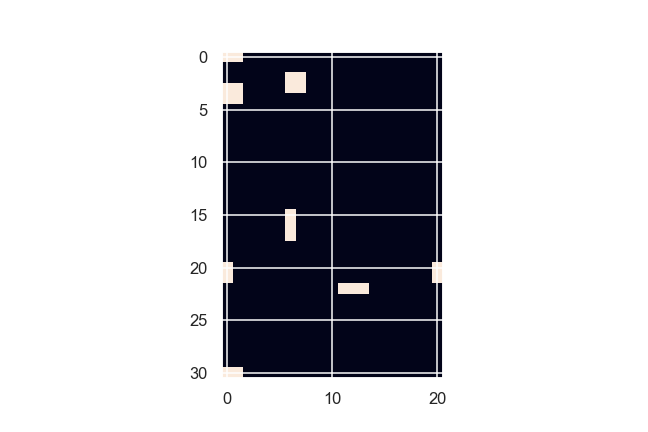

In [943]:
test = LifeGrid() 
test.step() 
test._animate_init() 
for i in range(500):
   test._animate_step()    

In [941]:
# Task 2.1

def steady_stateTest(p, warmup = 50, steps = 200, grid_dims = (31, 21)):
    
    grid = np.random.rand(grid_dims[0], grid_dims[1])
    
    test = LifeGrid(prob = p)
    
    for i in range(warmup):
        test.step()
    
    num_alive = np.zeros(steps)
    
    for i in range(steps):
        num_alive[i] = np.sum(test.grid)
        test.step()
    
    fraction_alive = num_alive/(grid_dims[0]*grid_dims[1])
    
    sample_mean = sum(fraction_alive)/steps
    sample_var = sum((fraction_alive - sample_mean)**2)/(steps-1)
    
    return sample_mean, np.sqrt(sample_var)

In [954]:
for i in range(20):
    print(steady_stateTest(0.3))

(0.004608294930875562, 1.3912612926078192e-17)
(0.013824884792626769, 3.9998762162474797e-17)
(0.0, 0.0)
(0.1008909370199692, 0.026265911045172712)
(0.0368663594470045, 1.1130090340862554e-16)
(0.0, 0.0)
(0.007680491551459281, 1.2173536310318418e-17)
(0.030783410138248795, 0.0008689484254212506)
(0.009216589861751124, 2.7825225852156384e-17)
(0.016897081413210523, 7.651937109343005e-17)
(0.07360215053763441, 0.03952546069292685)
(0.013824884792626769, 3.9998762162474797e-17)
(0.1041321044546851, 0.020900623363699945)
(0.004608294930875562, 1.3912612926078192e-17)
(0.0802688172043011, 0.026436108190422195)
(0.01843317972350225, 5.565045170431277e-17)
(0.023041474654377826, 5.565045170431277e-17)
(0.009216589861751124, 2.7825225852156384e-17)
(0.006144393241167423, 1.2173536310318418e-17)
(0.04259600614439301, 0.0380280196229317)


## Psuedo-Random Number Generators

The purpose of the code to follow is to investigate the nature of basic psuedo-random number generators.

In [882]:
def prng_randu( nsamples=2, seed=13, multval=65539, modval=2**31, scale=True):
    
    sequence = np.zeros( nsamples, dtype=np.int32 )
    sequence[0] = seed
    
    for i in range(1,nsamples): 
        sequence[i] = multval*sequence[i-1] % modval
        
    if scale:
        sequence = sequence / np.double(modval)
        
    return sequence

In [899]:
x = prng_randu(nsamples = 500000, seed = 40321)

<ipython-input-882-148b907d6169>:7: RuntimeWarning: overflow encountered in long_scalars
  sequence[i] = multval*sequence[i-1] % modval


<IPython.core.display.Javascript object>


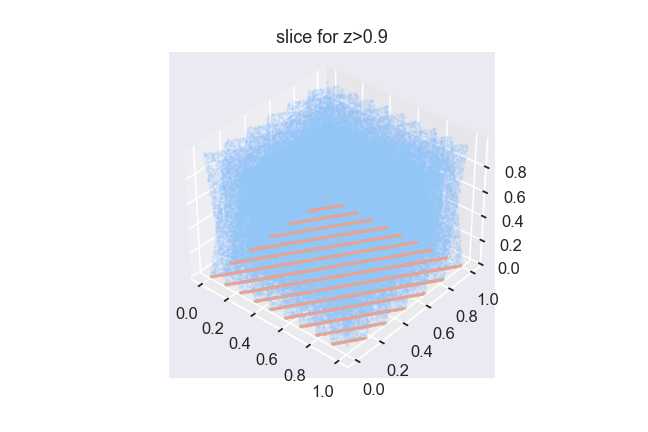

Text(0.5, 0.92, 'hyperplanes')

In [894]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

nn = 500000
#xx, yy, zz = x[0:6000].reshape(3,-1)
xx, yy, zz = x[0:nn-3:3], x[1:nn-2:3], x[2:nn-1:3]

plt.plot( xx,yy,zz, '.', ms=1.5, alpha=0.1)
plt.title('hyperplanes')

<IPython.core.display.Javascript object>


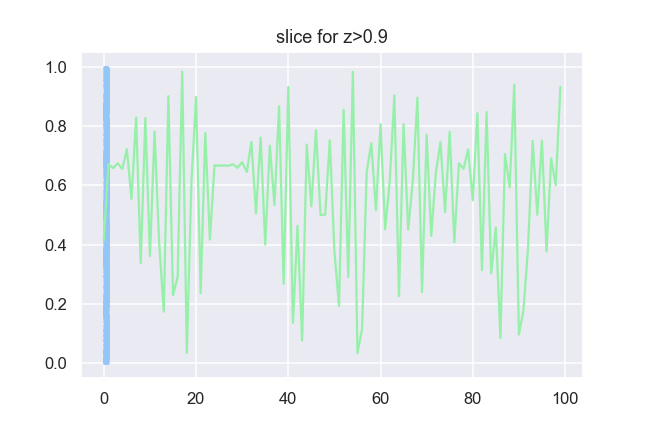

Text(0.5, 1.0, 'slice for z>0.9')

In [900]:
plt.plot( xx[zz>0.9], yy[zz>0.9], '.', ms=1.5, alpha=0.1)
plt.title('slice for z>0.9')

In [901]:
def symbol_entropy(datalist):
    '''Estimate the Shannon entropy for a sequence of symbols.
    '''
    
    hist = {}
    for item in datalist:
        if item not in hist:
            hist[item] = 1
        else: 
            hist[item] += 1
            
    counts = np.array( [hist[item] for item in hist])
    prob = counts / np.sum(counts)
    prob = prob[ prob != 0 ] #; print(prob)
    entropy = -np.sum( prob * np.log2(prob) )

    return entropy

In [906]:
?unix_rand.seed

Object `unix_rand.seed` not found.


In [911]:
def isbitset(sequence, setbit):
    bit_seq = [np.unpackbits( np.uint8(sequence[i]) )[::-1] for i in range(len(sequence))]
    
    true_false = []
    
    for i in range(len(bit_seq)):
        if bit_seq[i][setbit] == 1:
            true_false.append(True)
        else:
            true_false.append(False)
            
    return true_false

In [912]:
isbitset( [0,2,1,4,7], 1 )

[False, True, False, False, True]

In [913]:
def unix_rand(seed=None):
    
    unix_rand.seed = unix_rand.seed if seed is None else seed
    if unix_rand.seed is None:
        unix_rand.seed = 0
    
    multval, addval, maxval = 1103515245, 12345, 2**31
    unix_rand.seed = (multval * unix_rand.seed + addval) % maxval
    
    return unix_rand.seed

In [924]:
isbitset([unix_rand() for i in range(50)],4)

[False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True]

In [927]:
isbitset(np.random.randint(
    low=0, high=2**31, size=1_000_000, dtype=np.int32),1)

[False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False